# **TAREA 2 - MODELO DE FRENADO VEHICULAR**
Juan José Ruiz Ruiz - ID:8959602

Un modelo de frenado vehícular es muy útil en la seguridad vial; este permine conocer la distancia que un vehículo necesita para detenerse. En este caso, se presentan dos formas de calcular la distancia de frenado: uno por medio de la regla de los 2 segundos; y la otra por medio de un modelo planteado inicialmente en clase.

## **Regla de los dos segundos**

Acá no importa la velocidad, solo se necesita un punto definido en la carretera, y cuando el vehículo que va adelante pase por ahí contar "mil uno, mil dos" que son equivalentes a 2 segundos. Si se alcanza la marca antes de terminar de decir las palabras, implica que estas siguiente muy de cerca al vehiculo.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


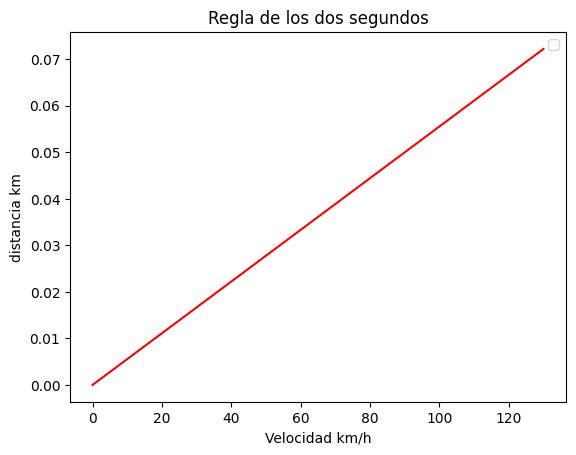

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 

v = np.linspace(0,130,1000)
x = v*(2/3600)

plt.plot(v,x,'-r')
plt.title("Regla de los dos segundos")
plt.xlabel("Velocidad km/h")
plt.ylabel("distancia km")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


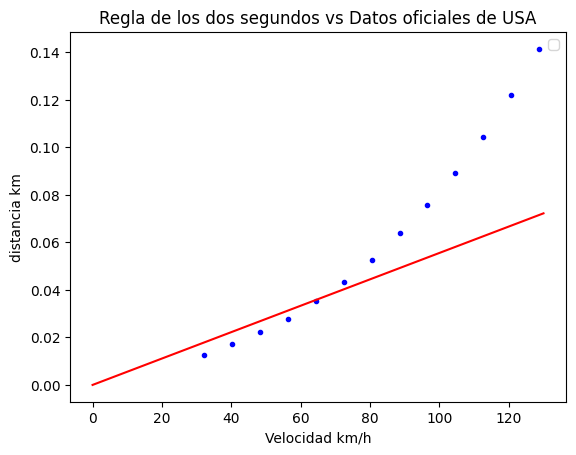

In [15]:
# Regla de los 2 segundos vs datos de la oficina de USA
xdata = np.array([20.0,25,30,35,40,45,50,55,60,65,70,75,80])
xdata*=1.60934

ydata = np.array([42,56,73.5,91.5,116,142.5,173,209.5,248,292.5,343,401,464])
ydata*=0.0003048

plt.plot(xdata,ydata,'.b')
plt.plot(v,x,'-r')
plt.title("Regla de los dos segundos vs Datos oficiales de USA")
plt.xlabel("Velocidad km/h")
plt.ylabel("distancia km")
plt.legend()

Como vemos, la regla de los dos segundos podría funcionar bien hasta los 70 km/h aproximadamente.

Sin embago, luego lo que podría suceder es luego de que después de los 80 km/h, la regla no parece ser tan eficiente; pues los datos nos muestra que la distancia de frenado es mucho mayor, lo cual podria ocasionar un accidente o un choque.

¿Qué otro modelo se podría proponer?

## **Modelo**

Para este modelo, se pueden considerar dos submodelos (momentos) para que un vehículo se detenga totalmente; el primer momento es la reacción que tiene el conductor para activar los frenos y el segundo momento desde que se pisa el freno hasta que el vehículo se detenga.

A continuación se verá que variables podrían ser consideradas para cada uno de los submodelos.

### Distancia de reacción

Es la distancia que recorre el vehiculo desde el momento en el que el conductor percibe la necesidad de detenerse hasta el momento en que se aplican los frenos.

Para este submodelo se generaliza al conductor y otros factores como el estado de alerta, la visibilidad y los reflejos. Esto nos lleva a una función que dependa del tiempo de respuesta del conductor y la velocidad en que vaya el vehículo.$f$ (tiempo de repuesta, velocidad).

La distancia de reacción puede ser calculada mediante la ecuación clásica de la física de movimiento rectilíneo uniforme:

$$d_{reacción} = v.t_{reacción}$$

Tenemos consistencia de unidades, y además estamos aplicando principios fundamentales de física.

Sería lógico pensar que una persona que tenga un tiempo de reacción bajo y vaya a una velocidad baja, tenga una distancia de reacción menor; a una persona que su tiempo de respuesta sea mayor y vaya una velocidad alta.

Por ejemplo, supongamos que el tiempo de reacción de una persona es de 1 s y va a una velocidad de 15 m/s (aprox. 54 km/h); luego, la distancia de frenado es de 15 m. Ahora bien supongamos que el tiempo de reacción de una persona que va a la misma velocidad del caso anterior, es de 2 s; en este caso la distancia de frenaod aumenta a 30 m.

Entonces, ¿Qué factores pueden influir en el tiempo de reacción?

En primer lugar, es importante considerar que, de acuerdo con las normas para obtener una licencia de conducción, se asumen varias cosas; por ejemplo que la persona que vaya conduciendo este en condiciones físicas adecuadas (audición, visión); que tiene la capacidades mentalmente suficiente; no está influenciado por sustancias. Se espera que la persona esté certificada por un Centro de Enseñanza Automovilístico Autorizado [1].

De acuerdo con un artículo que aborda el tiempo de reacción de personas con diferentes características [2], donde se tomaron los tiempos de reacción de 410 persona, el tiempo de reacción se puede ver afectado por las siguientes variables:

#### Edad
Se observa que a medida de que a edad de los conductores aumentaba, los tiempos de reacción también lo hacían; por ende también la distancia de frenado. En este caso, las personas con edad superior a los 62, la mayoría mostro una velocidad mayor a 1 segundo; mientras que las personas más jovenes, la mayoría bajaba de los 0.751 segundos de reacción. 

#### Género
Se logro determinar que el género tuvo un impacto significativo en los tiempos de reacción. Las mujeres obtuvieron tiempos de reacción más largos en comparación con los hombres; posiblemente debido a factores hormonales y fisiológicas. 

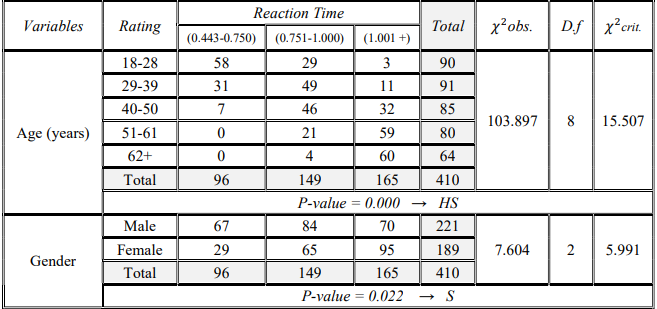

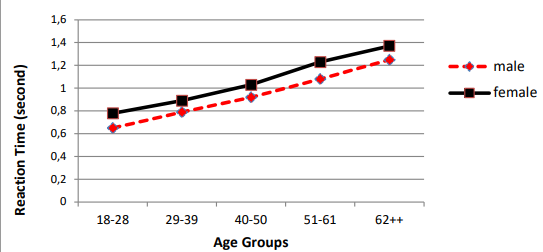

En base a esto, es posible plantear un submodelo para la distancia de reacción que tome en cuenta la velocidad del vehículo ($v$), la edad ($e$) y el género ($g$) del conductor:

$$d_{reaccion}(v,e,g) = v*t(e,g)$$

Donde $v$ es la velocidad del vehículo, $t$ es una función que calcula el tiempo de reacción de acuerdo a la edad $e$ y género $g$ de la persona.

### Distancia de frenado



Esta es la longitud necesaria para que los frenos detengan completamente al vehículo. Durante este periodo, se determinaron dos variables: la velocidad del vehículo, y el peso del vehículo.

Para esta parte, se puede suponer que el vehiculo está en condiciones normales o estables, de acuerdo con las reglamentaciones que hace la Superintendencia de Transporte.

Podemos considerar también una variable adicional: el estado de la carretera; por ejemplo si la carretera esta húmeda, seca, helada, entre otras. Cuando la carretera se encuentra húmeda, el agarre (o adherencia) de los neumáticos disminuye, lo que hace que la distancia de frenado sea mayor [3] [4].

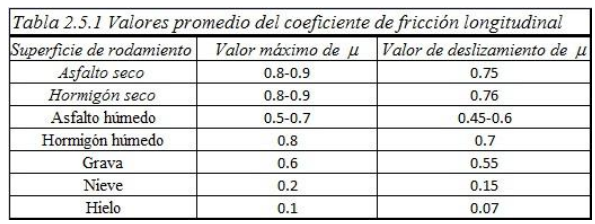

Por otra parte, el peso del vehículo es un importante factor a tener en cuenta. En un estudio, se encontró que un vehiculo pesado tiene una distancia de frenado más largo, lo cual indica que el peso influye en la capacidad de frenado y en la distancia para que el vehículo se detenga completamente [5].

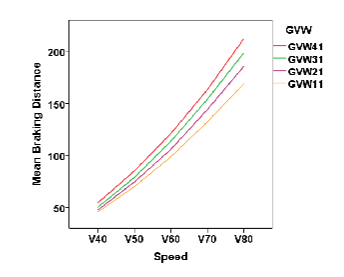

Con el estudio anterior, también se pudo concluir que la superficie de la carretera, tiene un impacto en la distancia significativa de los vehículos.

Entonces, tenemos:

$$d_{frenado} = f(v,W,\mu)$$

En donde, $v$ es la velocidad del vehículo, $W$ el peso del vehículo y $\mu$ es una variable que representa la condición de la vía. 

### Modelo final

Finalmente, entonces el modelo de frenado vehicular sería

$$d_{frenado-total} = d_{reacción} + d_{frenado}$$
$$d(v,e,g,W,\mu) = v*t(e,g) + f(v,W,\mu) $$

donde $t$ es una función que retorna el tiempo de la distancia de reacción que depende de $e$ y $g$; y $f$ es una función que retorna la distancia desde que se pisa el freno que depende de $v$, $W$, $\mu$.
- $v$ es la velocidad del vehículo. 
- $e$ es la edad de la persona. 
- $g$ es el género de la persona.
- $W$ es el peso del vehículo
- $\mu$ es un coefiente para representar el estado de la carretera.

## Referencias

[1] Ospina, A. (2019). Conozca los tipos de licenica de conducción en Colombia. Recuperado de: https://www.motor.com.co/industria/Conozca-los-tipos-de-licencia-de-conduccion-en-Colombia-20220523-0004.html

[2] Hichim M, et al (2020). The Effects of Driver Age and Gender on Vehicle
Stopping Distance Under Different Speeds. Recuperado de: http://www.istiee.unict.it/sites/default/files/files/Paper%201%20n%2080.pdf

[3] Unidad Nacional de Seguridad Vial (2020). Conducción con lluvía. Recuperado de: https://www.gub.uy/unidad-nacional-seguridad-vial/comunicacion/publicaciones/conduccion-lluvia#:~:text=Cuanto%20m%C3%A1s%20agua%20se%20acumule,hidroplanear%20y%20patinar%20sin%20direcci%C3%B3n

[4] Presta, D. (2013) ANALISIS DE LAS FUERZAS QUE ACTÚAN EN LA INTERFACE NEUMÁTICO – CARRETERA. MODELOS DE SIMULACIÓN DE
ACELERACIÓN. Recuperado de: https://cimec.org.ar/ojs/index.php/mc/article/viewFile/4490/4420

[5] Zamzamzadeh et al. (2016). Dynamic simulaation of brake pedal force effect on heavy vehicle braking distance under wet road conditions. Recuperado de: https://ijame.ump.edu.my/images/Volume_13_Issue_3_2016/2_Zamzamzadeh%20et%20al.pdf